# 0. Prerequisites

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1. Load and investigate the data here:

In [3]:
tennis_stats = pd.read_csv('tennis_stats.csv')
print(tennis_stats.info())
print(tennis_stats.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

The ATP men’s tennis dataset includes a wide array of tennis statistics, which are described below:

### Identifying Data
- Player: name of the tennis player
- Year: year data was recorded
### Service Game Columns (Offensive)
- Aces: number of serves by the player where the receiver does not touch the ball
- DoubleFaults: number of times player missed both first and second serve attempts
- FirstServe: % of first-serve attempts made
- FirstServePointsWon: % of first-serve attempt points won by the player
- SecondServePointsWon: % of second-serve attempt points won by the player
- BreakPointsFaced: number of times where the receiver could have won service game of the player
- BreakPointsSaved: % of the time the player was able to stop the receiver from winning service game when they had the chance
- ServiceGamesPlayed: total number of games where the player served
- ServiceGamesWon: total number of games where the player served and won
- TotalServicePointsWon: % of points in games where the player served that they won
### Return Game Columns (Defensive)
- FirstServeReturnPointsWon: % of opponents first-serve points the player was able to win
- SecondServeReturnPointsWon: % of opponents second-serve points the player was able to win
- BreakPointsOpportunities: number of times where the player could have won the service game of the opponent
- BreakPointsConverted: % of the time the player was able to win their opponent’s service game when they had the chance
- ReturnGamesPlayed: total number of games where the player’s opponent served
- ReturnGamesWon: total number of games where the player’s opponent served and the player won
- ReturnPointsWon: total number of points where the player’s opponent served and the player won
- TotalPointsWon: % of points won by the player
### Outcomes
- Wins: number of matches won in a year
- Losses: number of matches lost in a year
- Winnings: total winnings in USD($) in a year
- Ranking: ranking at the end of year

# 2. EDA

In [4]:
from scipy import stats

In [120]:
strong_correlated_w_wins = []
strong_correlated_w_losses = []
strong_correlated_w_winnings = []
strong_correlated_w_ranking = []

moderate_correlated_w_wins = []
moderate_correlated_w_losses = []
moderate_correlated_w_winnings = []
moderate_correlated_w_ranking = []

In [121]:
features_offensive = tennis_stats[[
    "Aces",
    "DoubleFaults",
    "FirstServe",
    "FirstServePointsWon",
    "SecondServePointsWon",
    "BreakPointsFaced",
    "BreakPointsSaved",
    "ServiceGamesPlayed",
    "ServiceGamesWon",
    "TotalServicePointsWon"
]]
features_defensive = tennis_stats[["FirstServeReturnPointsWon",
    "SecondServeReturnPointsWon",
    "BreakPointsOpportunities",
    "BreakPointsConverted",
    "ReturnGamesPlayed",
    "ReturnGamesWon",
    "ReturnPointsWon",
    "TotalPointsWon"
]]
outcomes = tennis_stats[['Wins', 'Losses', 'Winnings', 'Ranking']]

In [122]:
def CorrelationTest(feature: str, outcome: str) -> None:
  try:
    feature_col = tennis_stats[feature]
    outcome_col = tennis_stats[outcome]

    corr, p = stats.pearsonr(feature_col, outcome_col)
    
    if abs(corr) > 0.7:
      print(f'Variables are strongly linearly correlated with a correlation of: {corr}')
      if outcome == 'Wins':
        strong_correlated_w_wins.append([feature,corr])
      elif outcome == 'Losses':
        strong_correlated_w_losses.append([feature,corr])
      elif outcome == 'Winnings':
        strong_correlated_w_winnings.append([feature,corr])
      elif outcome == 'Ranking':
        strong_correlated_w_ranking.append([feature,corr])
    elif abs(corr) > 0.3 and abs(corr) < 0.7:
      print(f'Variables are moderately linearly correlated with a correlation of: {corr}')
      if outcome == 'Wins':
        moderate_correlated_w_wins.append([feature,corr])
      elif outcome == 'Losses':
        moderate_correlated_w_losses.append([feature,corr])
      elif outcome == 'Winnings':
        moderate_correlated_w_winnings.append([feature,corr])
      elif outcome == 'Ranking':
        moderate_correlated_w_ranking.append([feature,corr])
    else:
      print('Variables are uncorrelated')
  except Exception as e:
    print(f'An error occured when trying to find correlated variables: {str(e)}')


In [123]:
def FeatureVSOutcome(feature: str, outcome: str) -> None:
  plt.plot(tennis_stats[feature], tennis_stats[outcome], 'o')
  plt.xlabel(feature)
  plt.ylabel(outcome)
  plt.title(f"{feature} vs {outcome}")
  plt.show()
  plt.clf()

In [124]:
def FeaturesVSOutcomes(features: list, outcomes: list) -> None:
  for outcome in outcomes:
    for feature in features:
      FeatureVSOutcome(feature, outcome)
      CorrelationTest(feature, outcome)


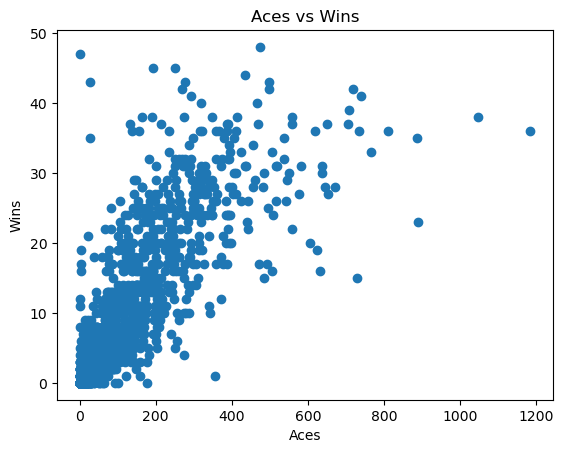

Variables are strongly linearly correlated with a correlation of: 0.8253011922488609


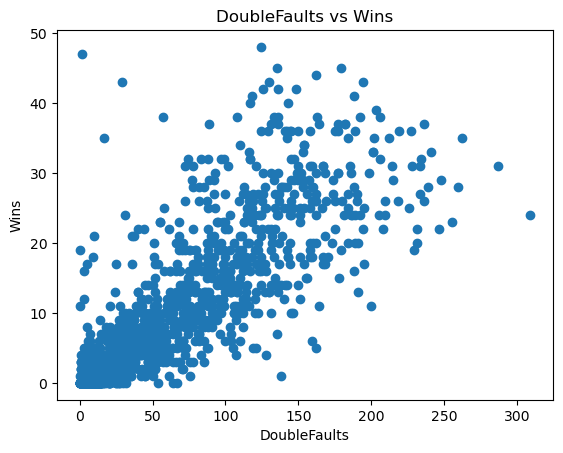

Variables are strongly linearly correlated with a correlation of: 0.8474593354009935


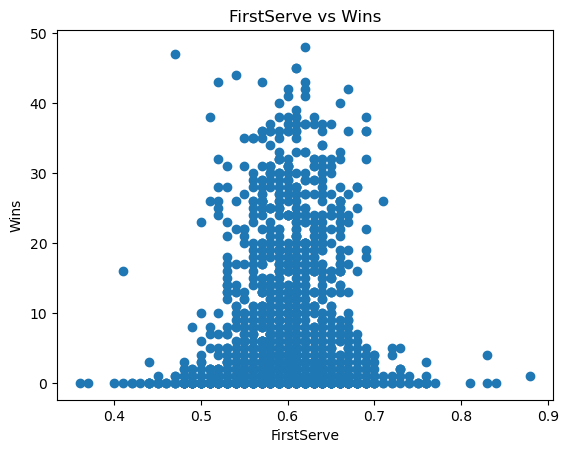

Variables are uncorrelated


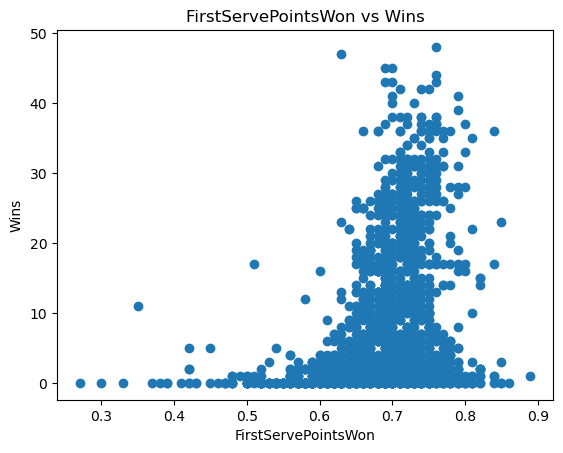

Variables are moderately linearly correlated with a correlation of: 0.3567016288756444


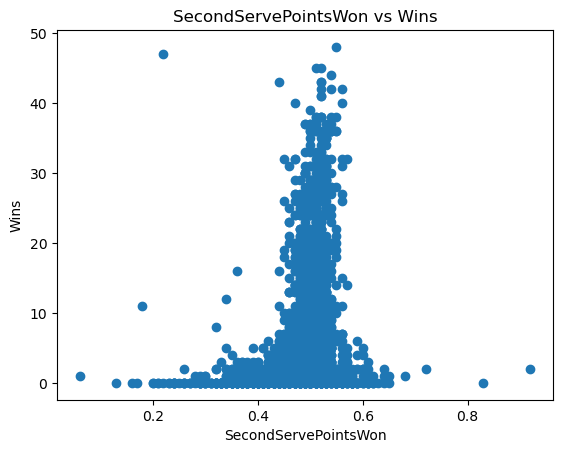

Variables are uncorrelated


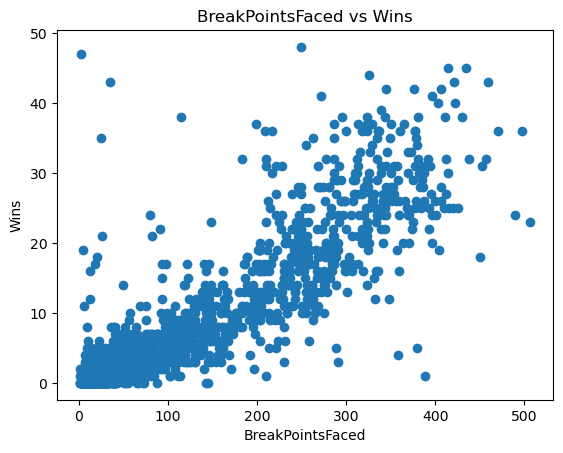

Variables are strongly linearly correlated with a correlation of: 0.8834699298437748


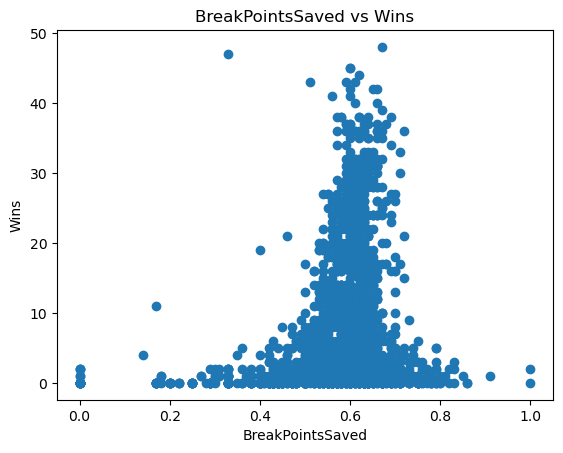

Variables are uncorrelated


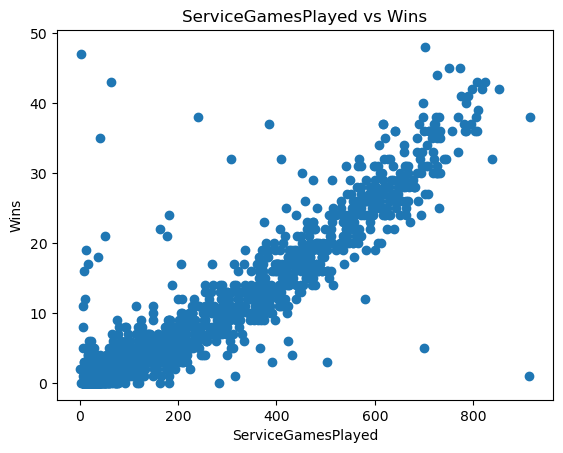

Variables are strongly linearly correlated with a correlation of: 0.9291525358241295


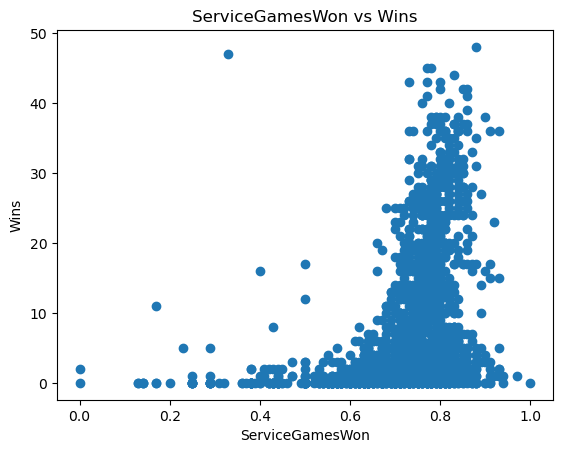

Variables are moderately linearly correlated with a correlation of: 0.3850403464836847


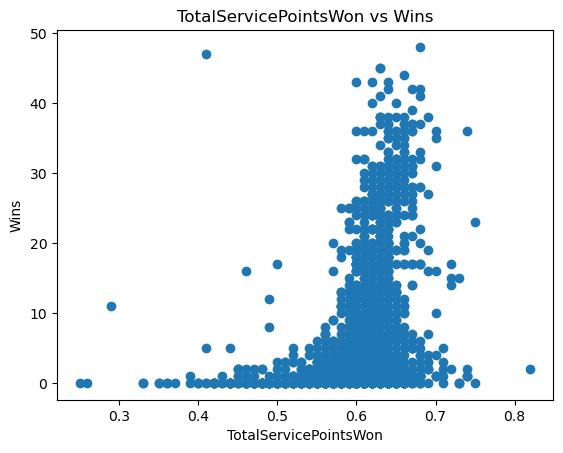

Variables are moderately linearly correlated with a correlation of: 0.3992703561393277


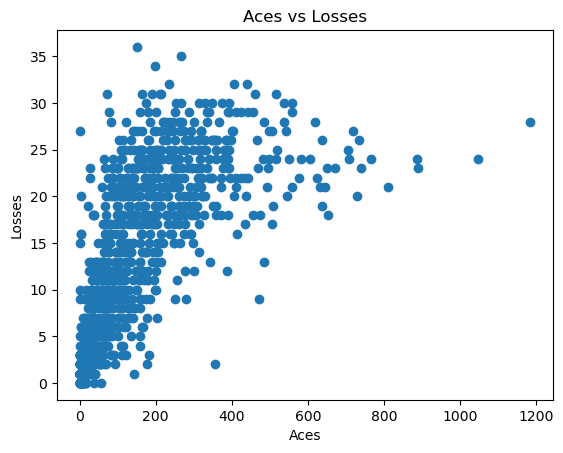

Variables are strongly linearly correlated with a correlation of: 0.7686283347845096


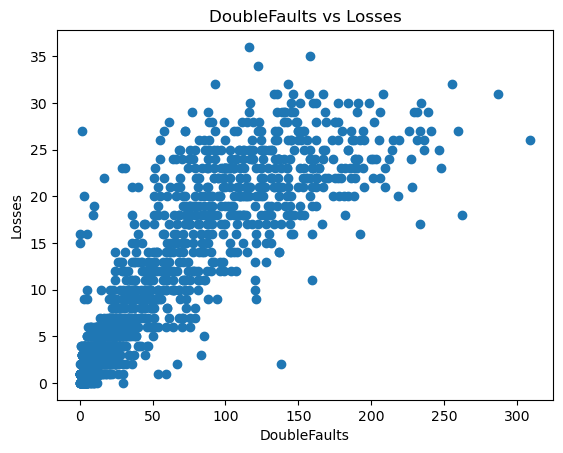

Variables are strongly linearly correlated with a correlation of: 0.8819221007707468


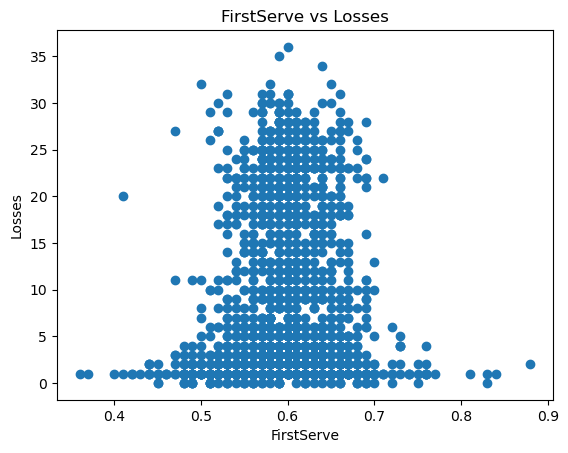

Variables are uncorrelated


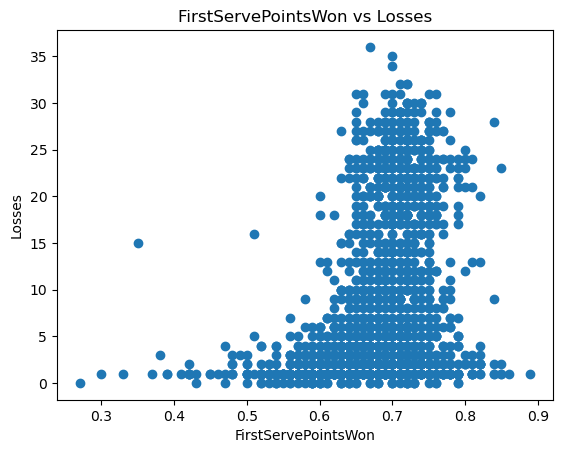

Variables are moderately linearly correlated with a correlation of: 0.3305809897996199


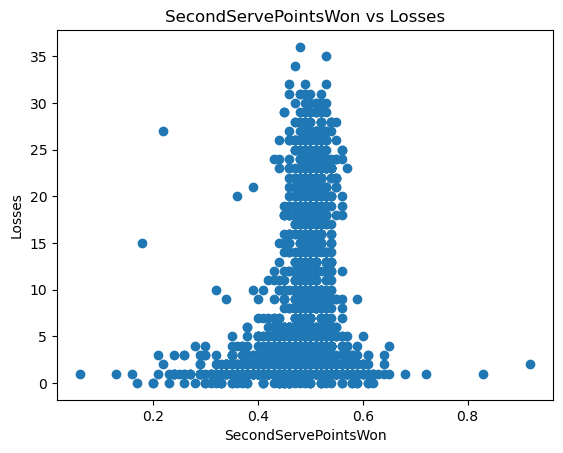

Variables are uncorrelated


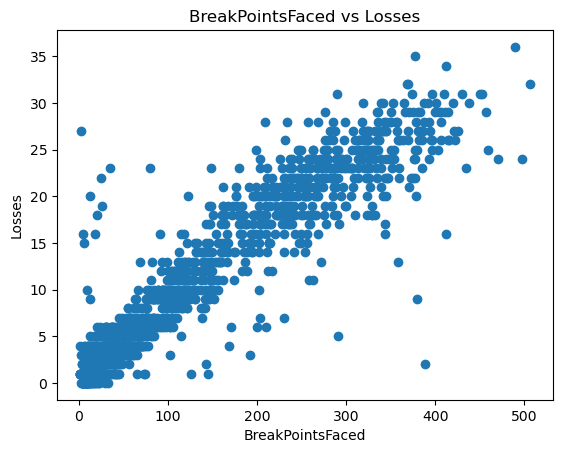

Variables are strongly linearly correlated with a correlation of: 0.9433086885312065


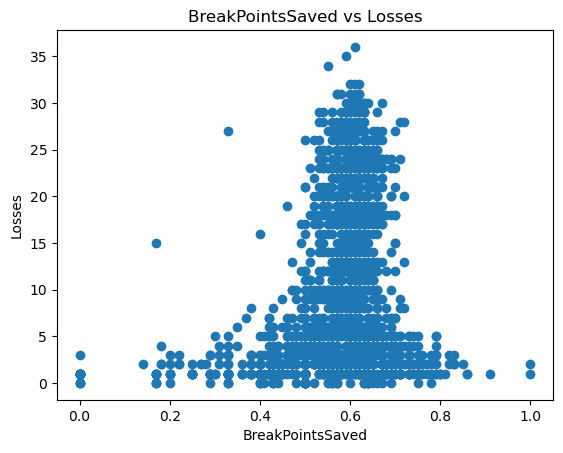

Variables are uncorrelated


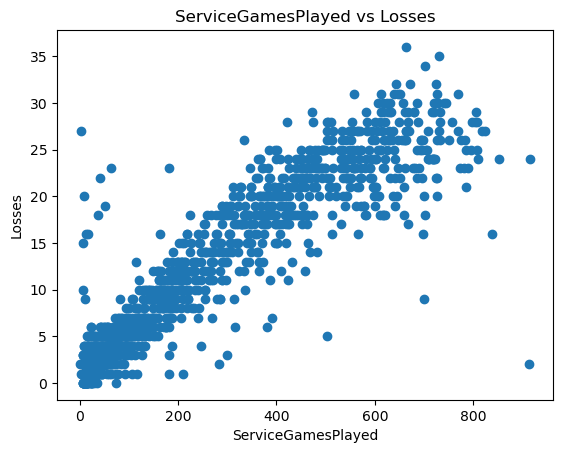

Variables are strongly linearly correlated with a correlation of: 0.9351823440696652


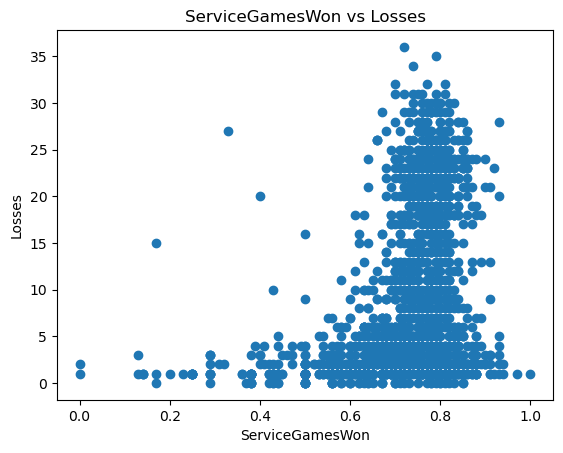

Variables are moderately linearly correlated with a correlation of: 0.36734476286223633


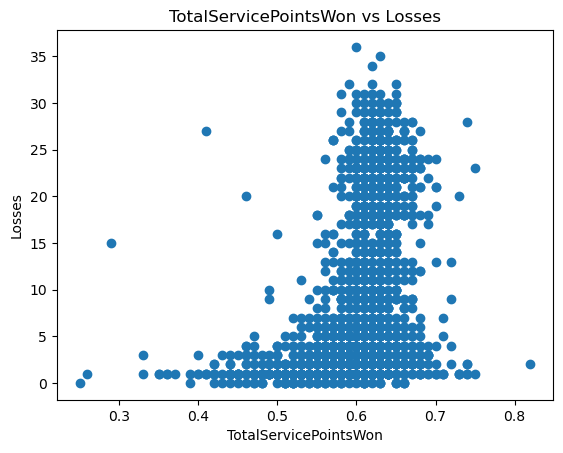

Variables are moderately linearly correlated with a correlation of: 0.3712825143021421


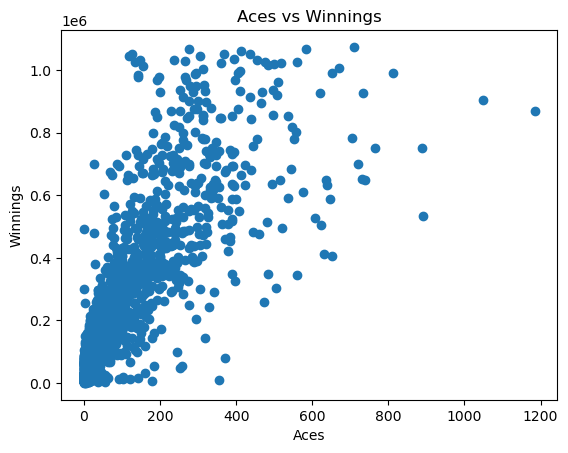

Variables are strongly linearly correlated with a correlation of: 0.7984043540699404


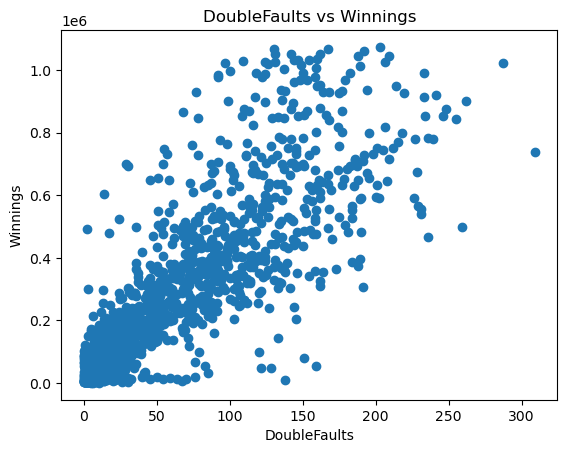

Variables are strongly linearly correlated with a correlation of: 0.854685178443894


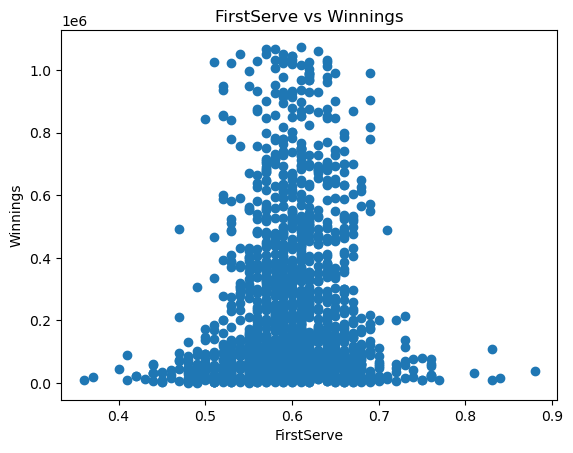

Variables are uncorrelated


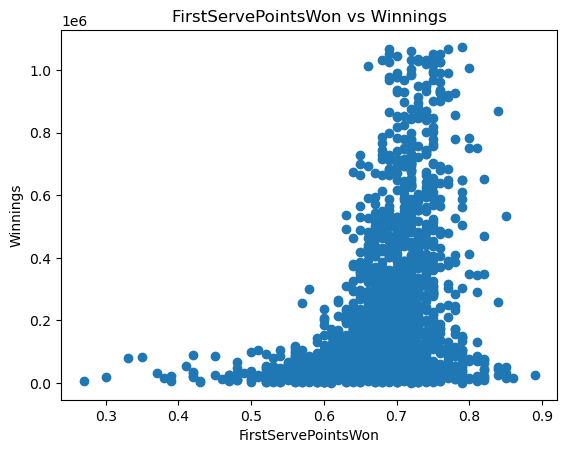

Variables are moderately linearly correlated with a correlation of: 0.3611210594929004


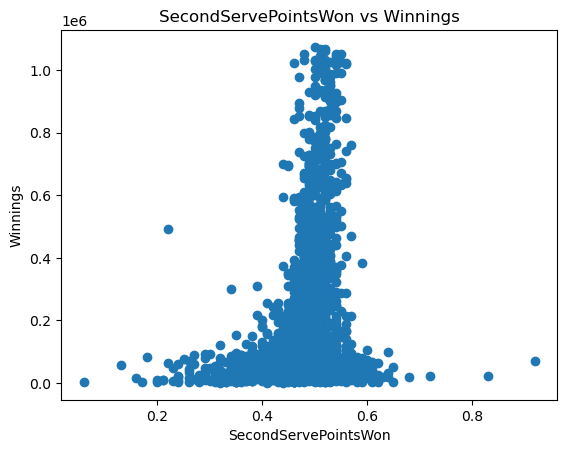

Variables are uncorrelated


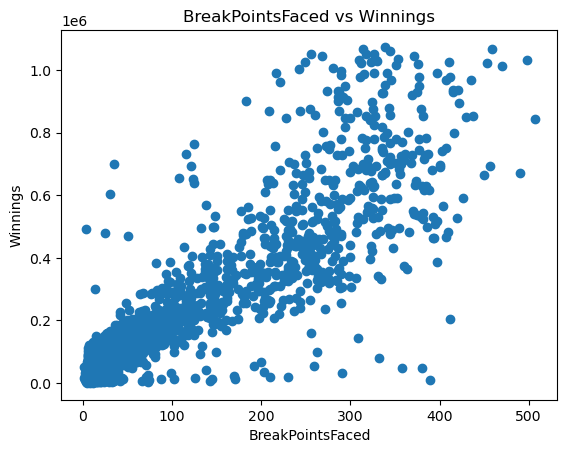

Variables are strongly linearly correlated with a correlation of: 0.8760356989199045


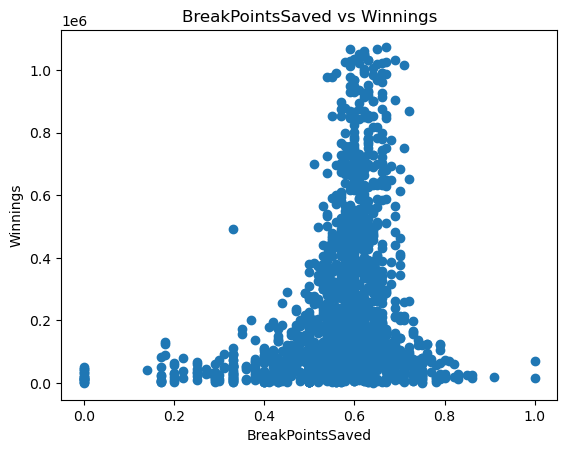

Variables are uncorrelated


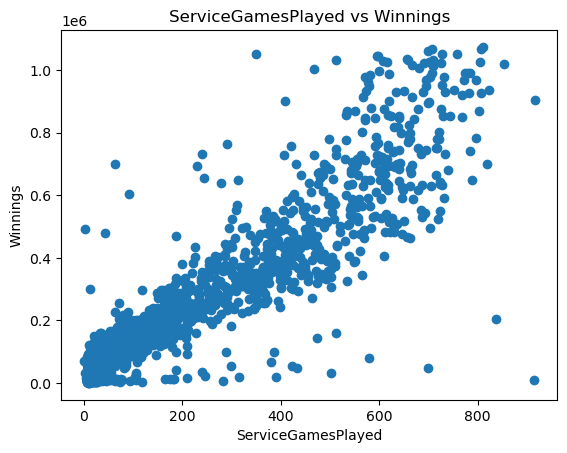

Variables are strongly linearly correlated with a correlation of: 0.9129849378413329


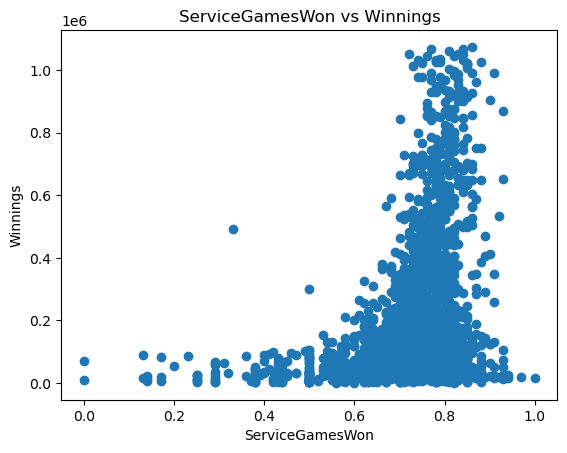

Variables are moderately linearly correlated with a correlation of: 0.3955771739851862


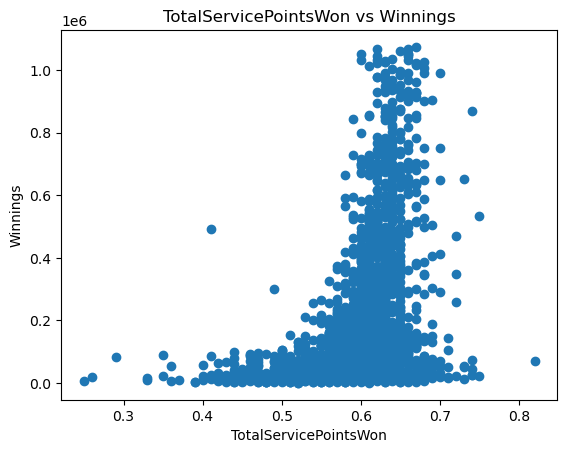

Variables are moderately linearly correlated with a correlation of: 0.40770700183938335


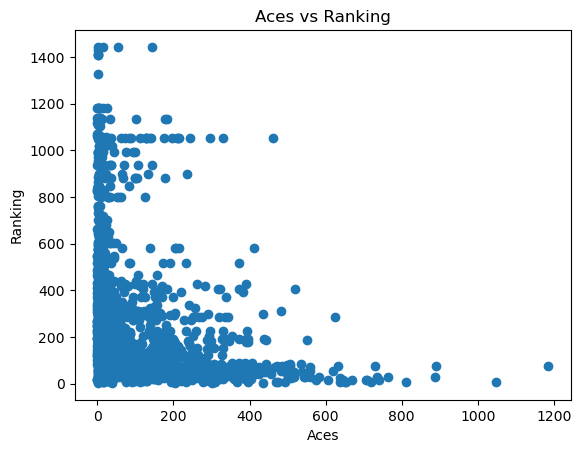

Variables are uncorrelated


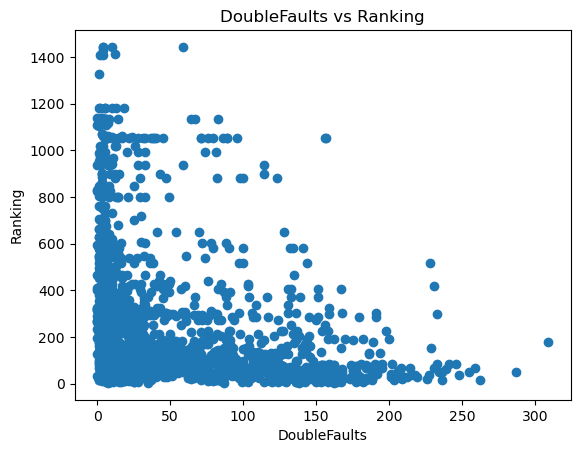

Variables are moderately linearly correlated with a correlation of: -0.30586627236039976


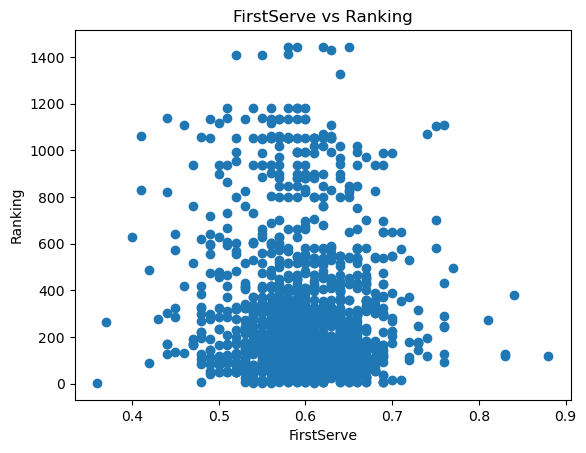

Variables are uncorrelated


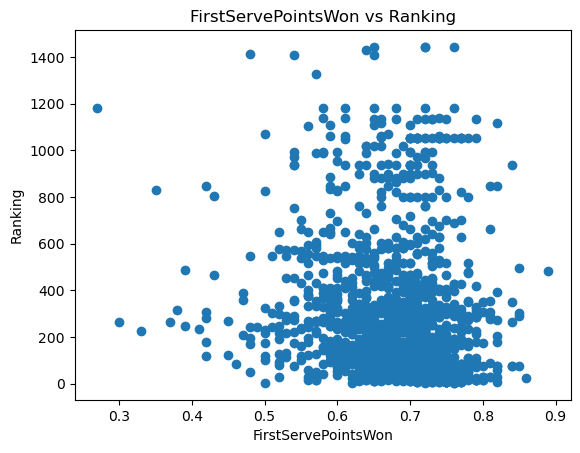

Variables are uncorrelated


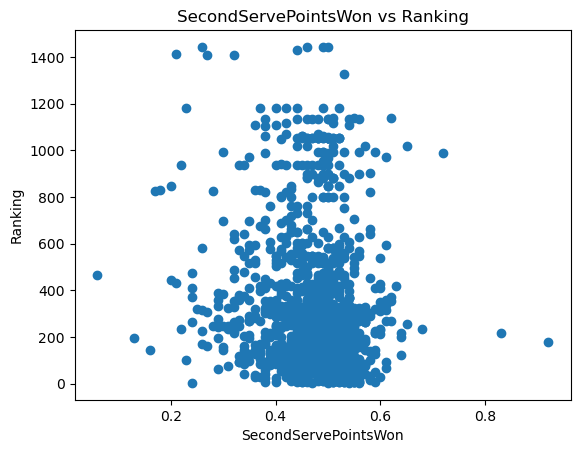

Variables are uncorrelated


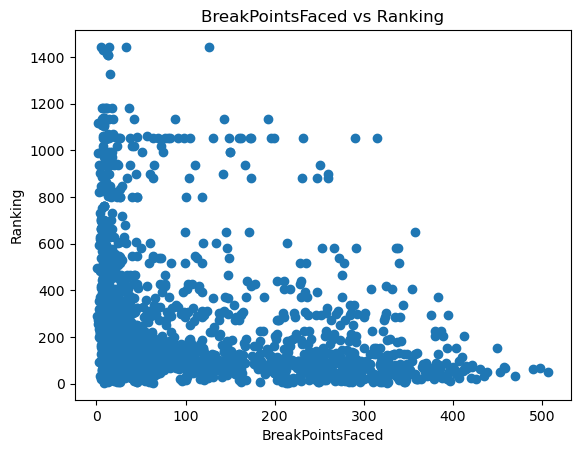

Variables are moderately linearly correlated with a correlation of: -0.32208209803052423


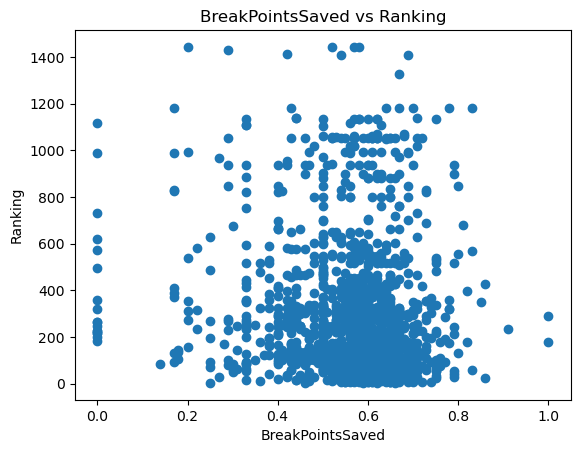

Variables are uncorrelated


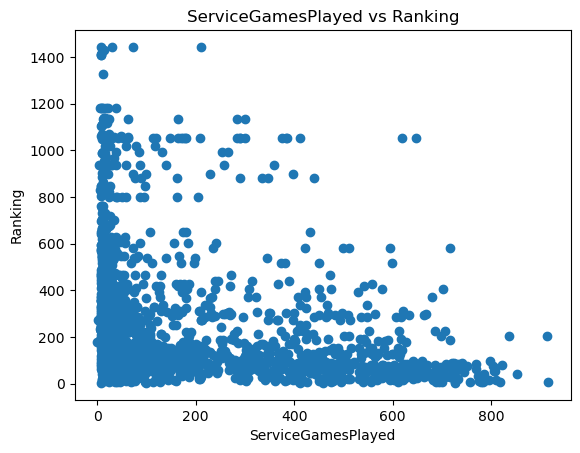

Variables are moderately linearly correlated with a correlation of: -0.33173802870082314


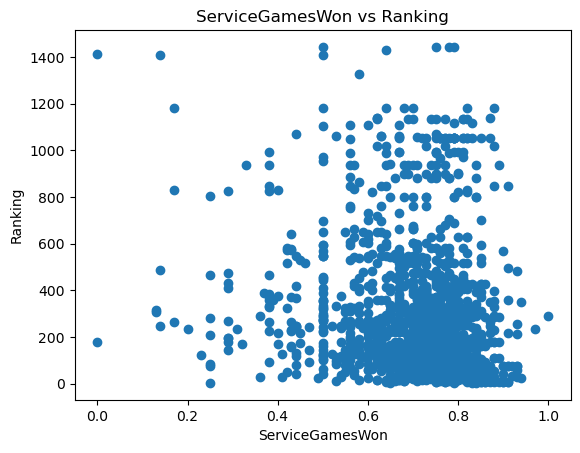

Variables are uncorrelated


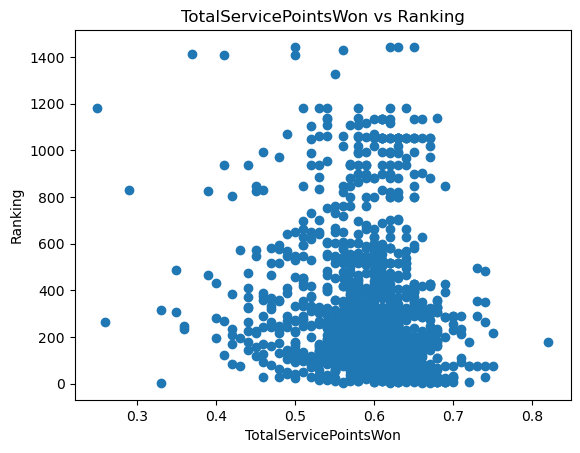

Variables are uncorrelated


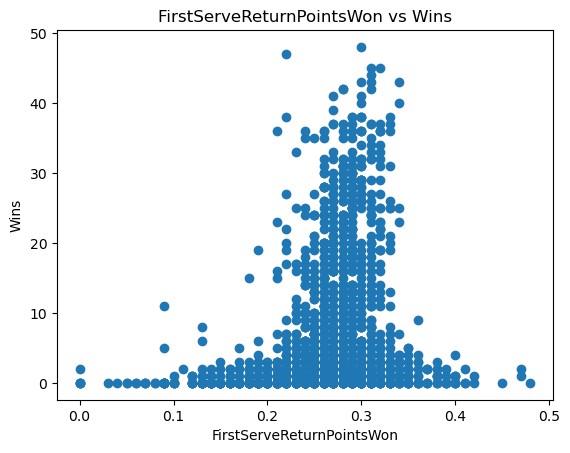

Variables are uncorrelated


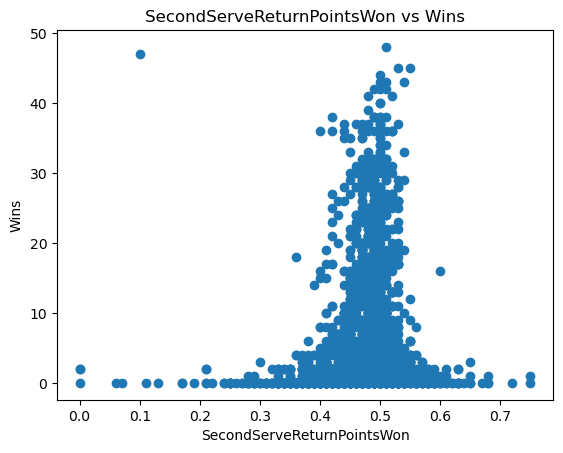

Variables are uncorrelated


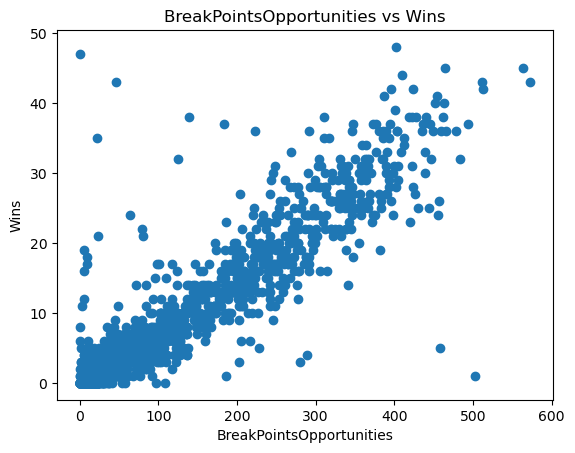

Variables are strongly linearly correlated with a correlation of: 0.9234533173669666


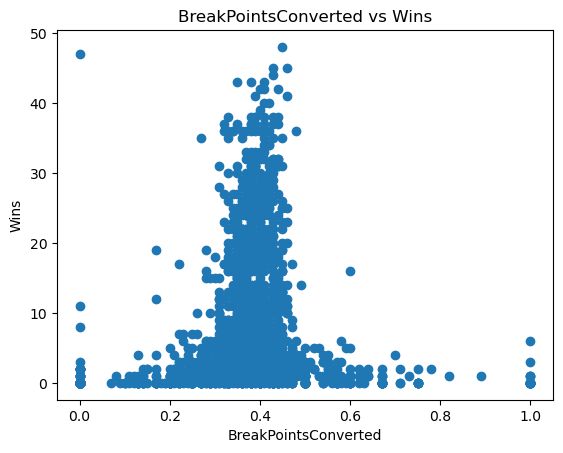

Variables are uncorrelated


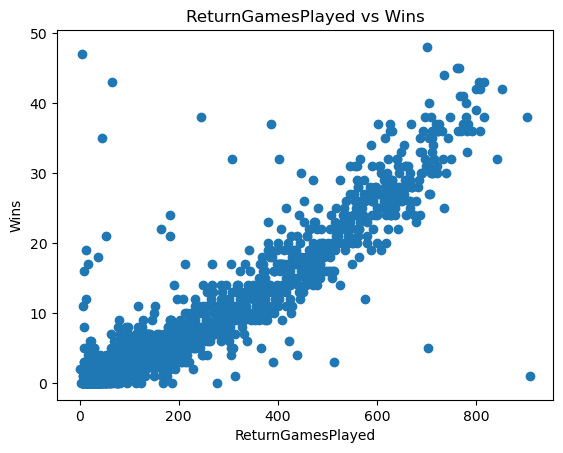

Variables are strongly linearly correlated with a correlation of: 0.9284076225806659


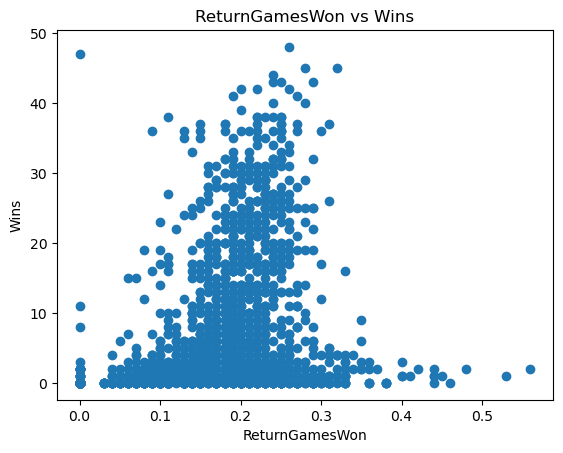

Variables are uncorrelated


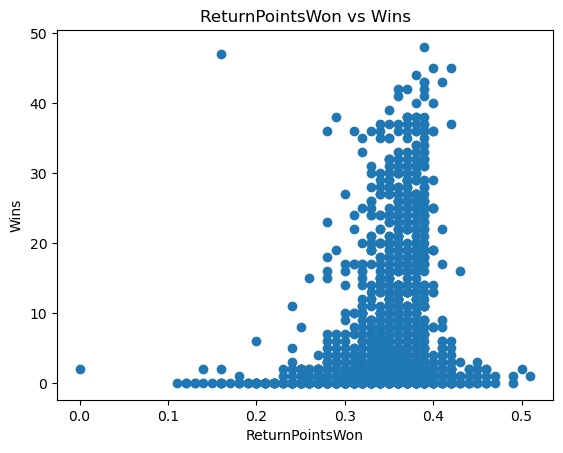

Variables are uncorrelated


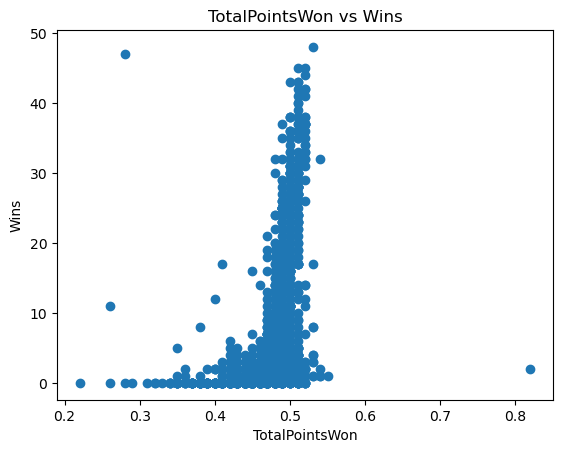

Variables are moderately linearly correlated with a correlation of: 0.4593683684191048


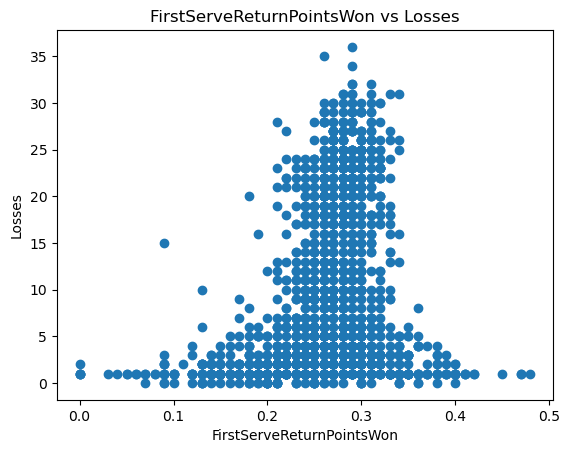

Variables are uncorrelated


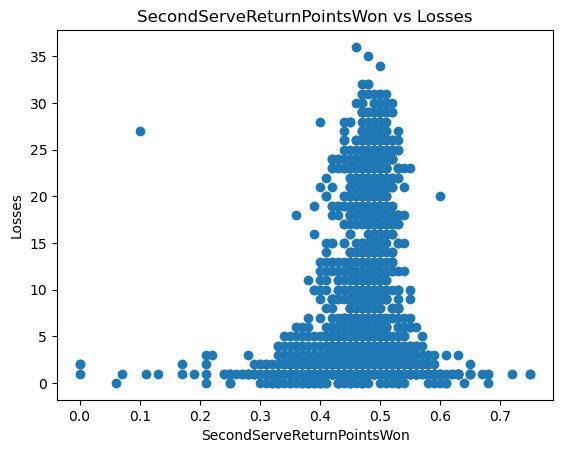

Variables are uncorrelated


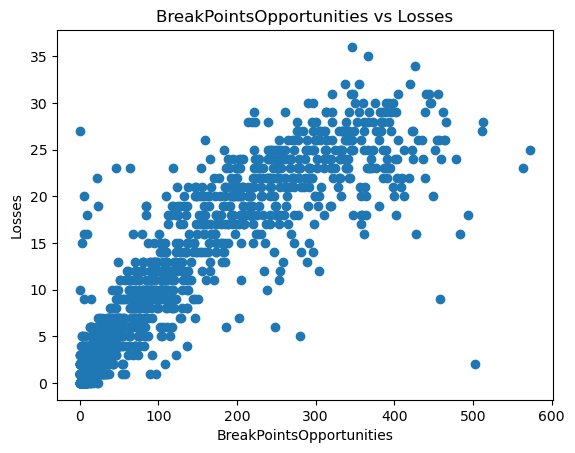

Variables are strongly linearly correlated with a correlation of: 0.9092952673707845


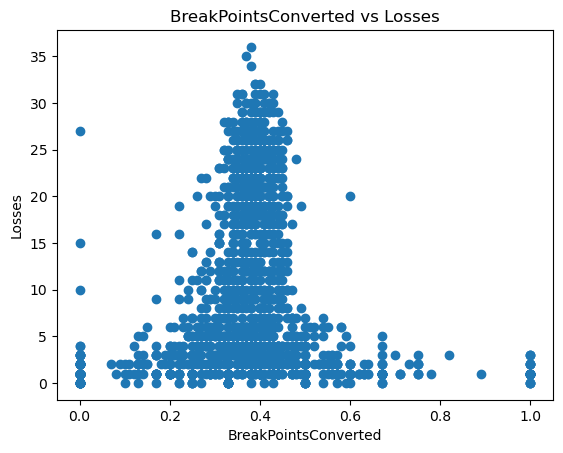

Variables are uncorrelated


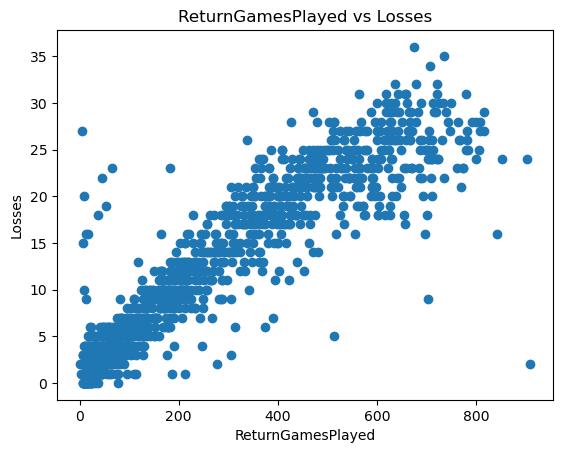

Variables are strongly linearly correlated with a correlation of: 0.9367552157905941


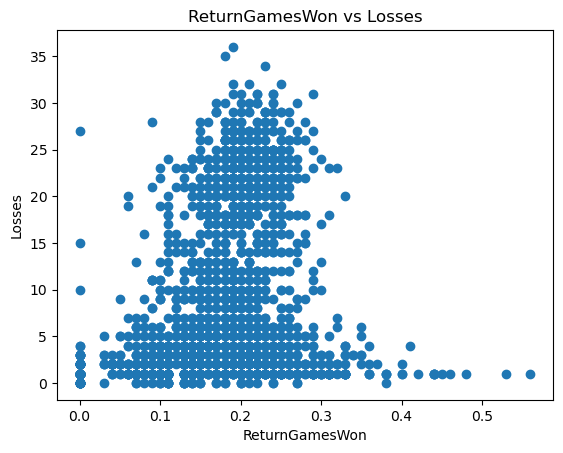

Variables are uncorrelated


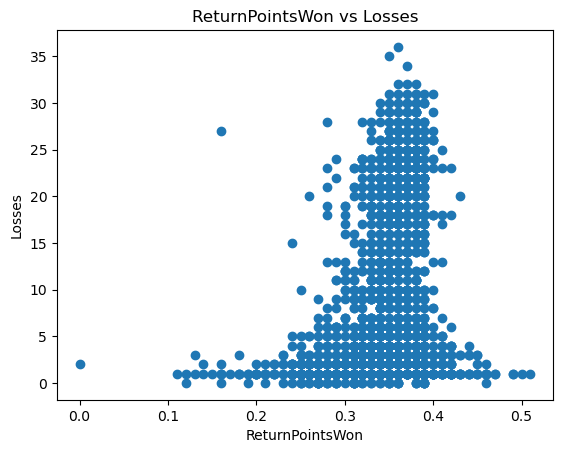

Variables are uncorrelated


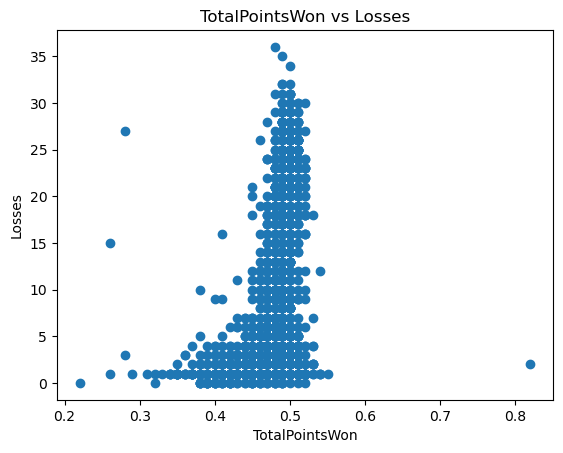

Variables are moderately linearly correlated with a correlation of: 0.42854345302380537


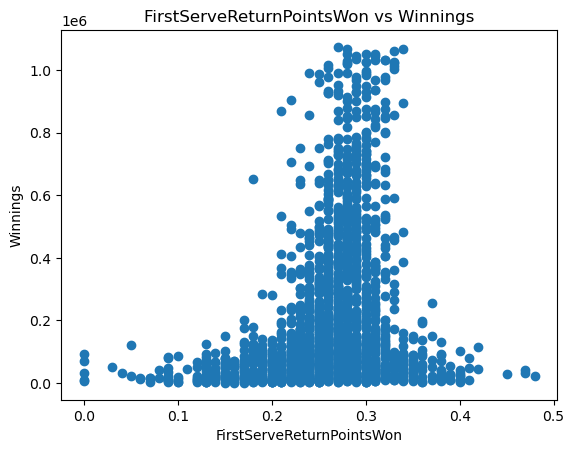

Variables are uncorrelated


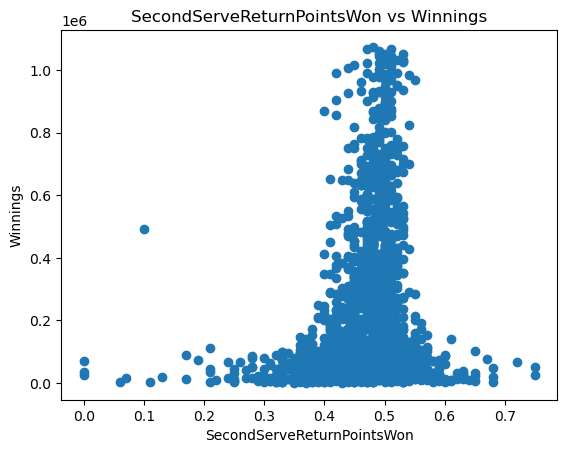

Variables are uncorrelated


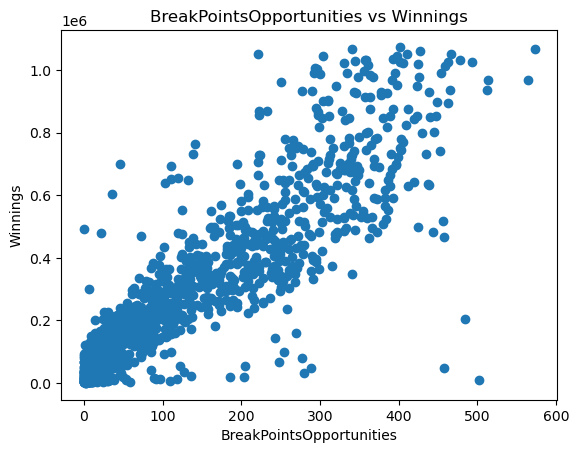

Variables are strongly linearly correlated with a correlation of: 0.9004439010037775


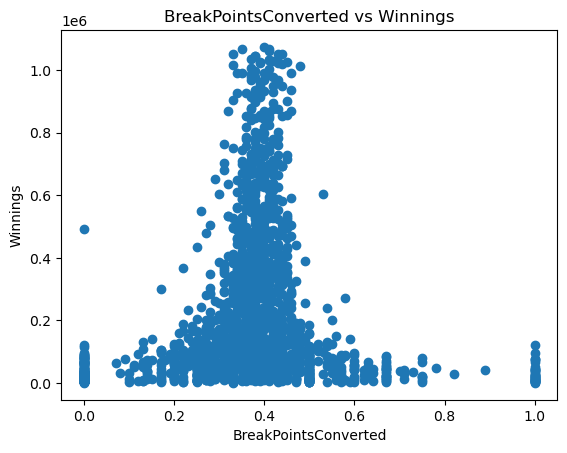

Variables are uncorrelated


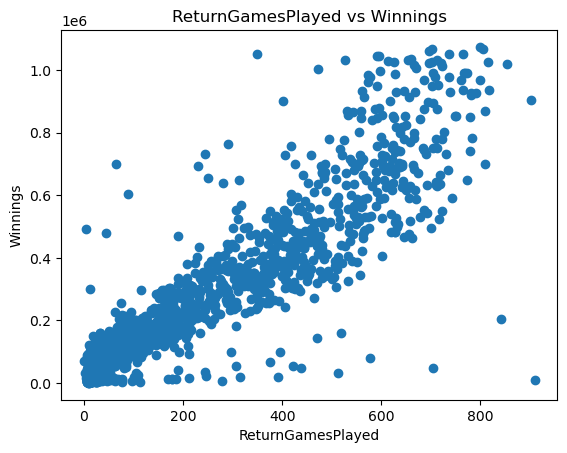

Variables are strongly linearly correlated with a correlation of: 0.9126126236635086


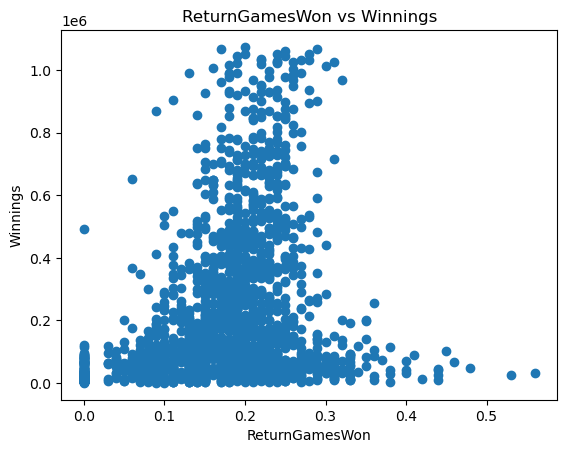

Variables are uncorrelated


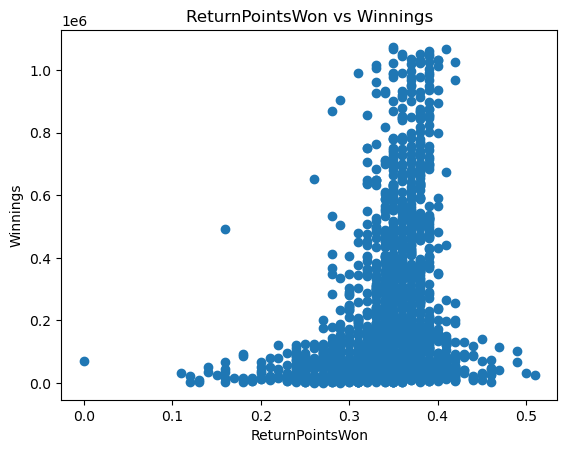

Variables are uncorrelated


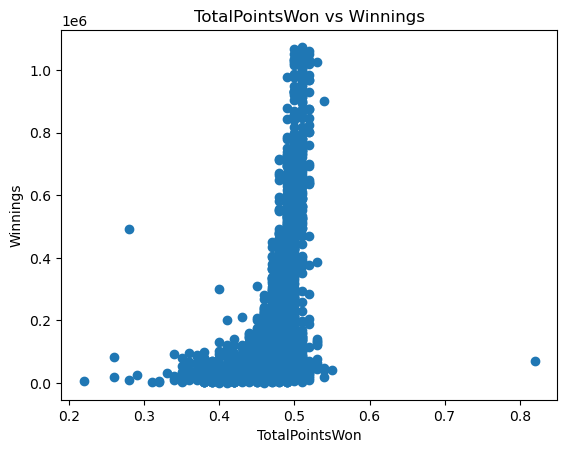

Variables are moderately linearly correlated with a correlation of: 0.46106082878124977


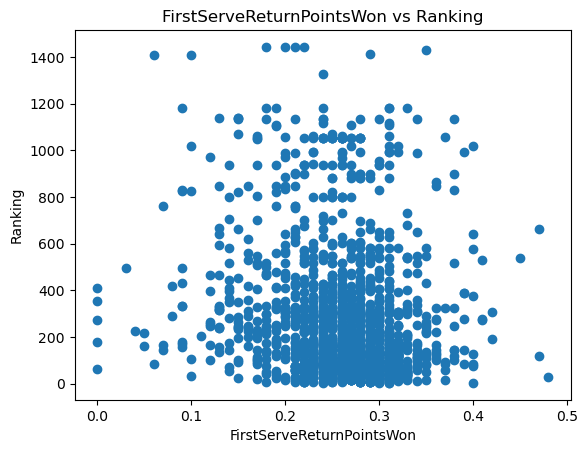

Variables are uncorrelated


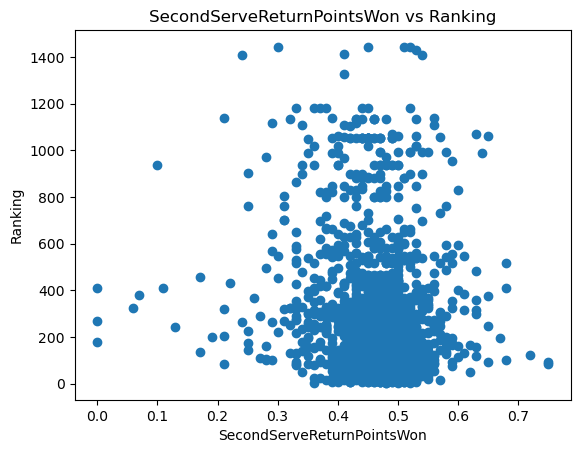

Variables are uncorrelated


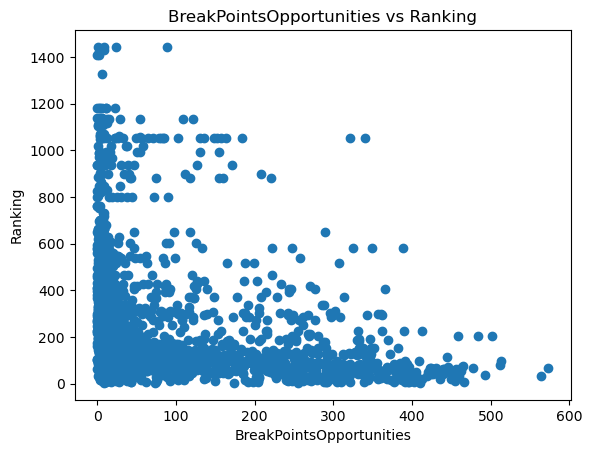

Variables are moderately linearly correlated with a correlation of: -0.334548336941215


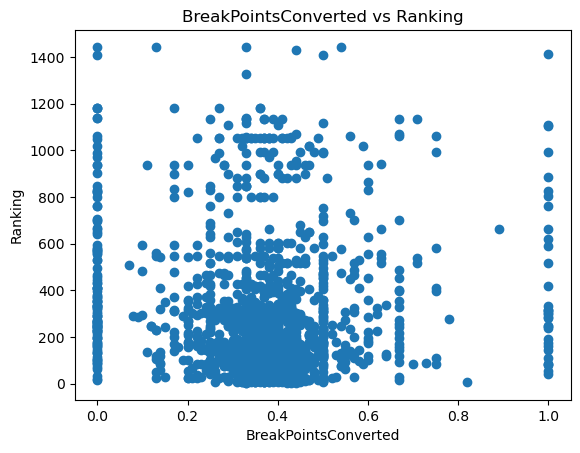

Variables are uncorrelated


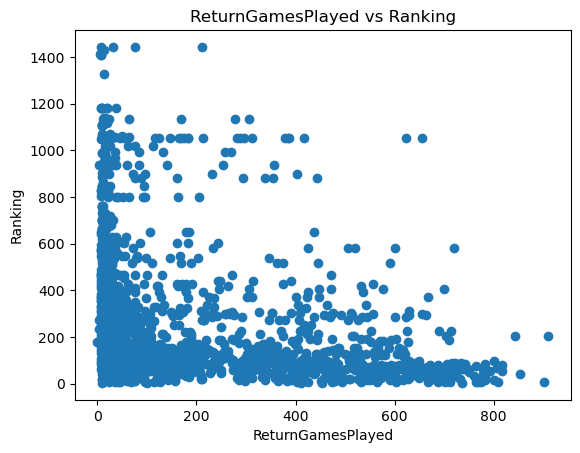

Variables are moderately linearly correlated with a correlation of: -0.3314781372066953


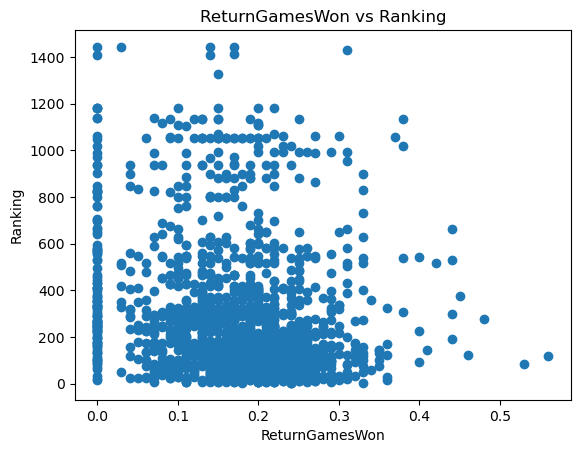

Variables are uncorrelated


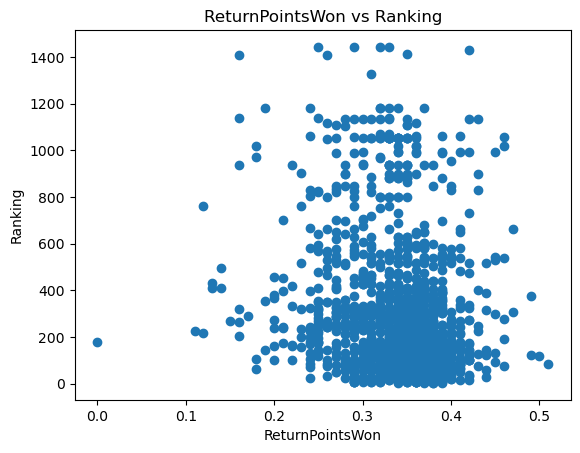

Variables are uncorrelated


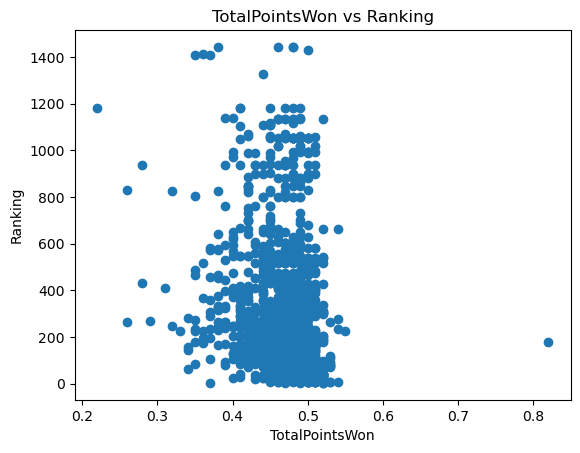

Variables are uncorrelated


<Figure size 640x480 with 0 Axes>

In [125]:
FeaturesVSOutcomes(features_offensive, outcomes)
FeaturesVSOutcomes(features_defensive, outcomes)

In [126]:
print(strong_correlated_w_wins)
print(strong_correlated_w_losses)
print(strong_correlated_w_winnings)
print(strong_correlated_w_ranking)

[['Aces', np.float64(0.8253011922488609)], ['DoubleFaults', np.float64(0.8474593354009935)], ['BreakPointsFaced', np.float64(0.8834699298437748)], ['ServiceGamesPlayed', np.float64(0.9291525358241295)], ['BreakPointsOpportunities', np.float64(0.9234533173669666)], ['ReturnGamesPlayed', np.float64(0.9284076225806659)]]
[['Aces', np.float64(0.7686283347845096)], ['DoubleFaults', np.float64(0.8819221007707468)], ['BreakPointsFaced', np.float64(0.9433086885312065)], ['ServiceGamesPlayed', np.float64(0.9351823440696652)], ['BreakPointsOpportunities', np.float64(0.9092952673707845)], ['ReturnGamesPlayed', np.float64(0.9367552157905941)]]
[['Aces', np.float64(0.7984043540699404)], ['DoubleFaults', np.float64(0.854685178443894)], ['BreakPointsFaced', np.float64(0.8760356989199045)], ['ServiceGamesPlayed', np.float64(0.9129849378413329)], ['BreakPointsOpportunities', np.float64(0.9004439010037775)], ['ReturnGamesPlayed', np.float64(0.9126126236635086)]]
[]


In [127]:
print(moderate_correlated_w_wins)
print(moderate_correlated_w_losses)
print(moderate_correlated_w_winnings)
print(moderate_correlated_w_ranking)

[['FirstServePointsWon', np.float64(0.3567016288756444)], ['ServiceGamesWon', np.float64(0.3850403464836847)], ['TotalServicePointsWon', np.float64(0.3992703561393277)], ['TotalPointsWon', np.float64(0.4593683684191048)]]
[['FirstServePointsWon', np.float64(0.3305809897996199)], ['ServiceGamesWon', np.float64(0.36734476286223633)], ['TotalServicePointsWon', np.float64(0.3712825143021421)], ['TotalPointsWon', np.float64(0.42854345302380537)]]
[['FirstServePointsWon', np.float64(0.3611210594929004)], ['ServiceGamesWon', np.float64(0.3955771739851862)], ['TotalServicePointsWon', np.float64(0.40770700183938335)], ['TotalPointsWon', np.float64(0.46106082878124977)]]
[['DoubleFaults', np.float64(-0.30586627236039976)], ['BreakPointsFaced', np.float64(-0.32208209803052423)], ['ServiceGamesPlayed', np.float64(-0.33173802870082314)], ['BreakPointsOpportunities', np.float64(-0.334548336941215)], ['ReturnGamesPlayed', np.float64(-0.3314781372066953)]]


# 3. Perform single feature linear regressions

Since Ranking is very uncorrelated in the dataset, this outcome is expected to be linearly inaccurately predicted.

In [81]:
import numpy as np

In [99]:
from typing import Union
def PerformLinearRegression(feature_selection: Union[list, str], outcome_selection: Union[list, str]) -> None:
    X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(tennis_stats[feature_selection]), tennis_stats[outcome_selection], train_size=0.8, test_size=0.2, random_state=1)

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    print(f'Coefficient: {np.round(lr.coef_,2)}')
    print(f'Coefficient of determination: {lr.score(X_test, y_test)}')

    y_pred = lr.predict(X_test)
    # Create a scatter plot
    plt.scatter(y_pred, y_test, alpha=0.4)
    
    # Create x-axis label and y-axis label
    plt.xlabel("y_predict")
    plt.ylabel("y_test")
    
    # Show the plot
    plt.show()

Coefficient: [0.53]
Coefficient of determination: 0.7194446589617185


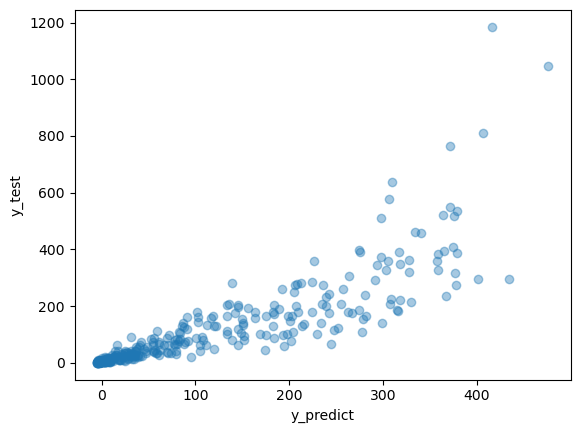

In [100]:
PerformLinearRegression('ServiceGamesPlayed', 'Aces')

Coefficient: [1850.12]
Coefficient of determination: 0.7790768695631647


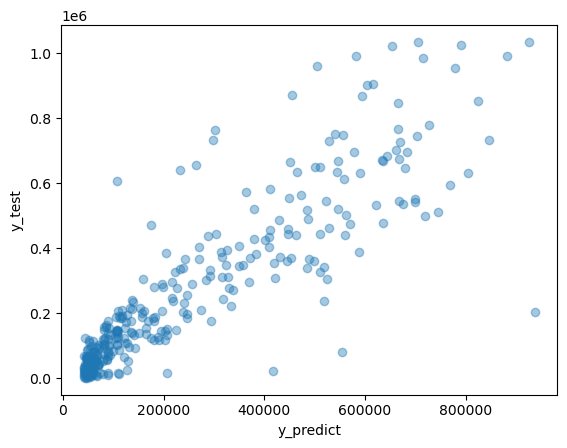

In [101]:
PerformLinearRegression('BreakPointsOpportunities', 'Winnings')

Coefficient: [0.04]
Coefficient of determination: 0.8901484697625038


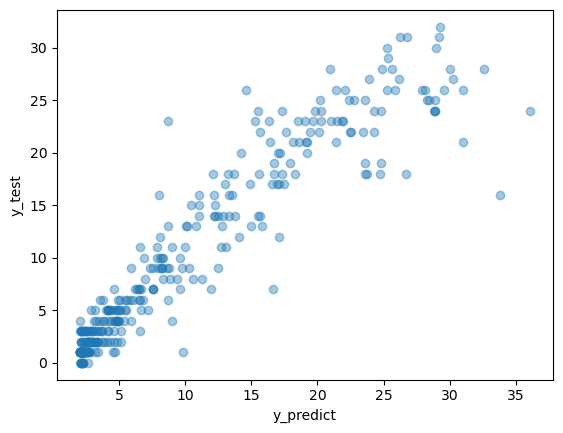

In [102]:
PerformLinearRegression('ReturnGamesPlayed', 'Losses')

Coefficient: [-381.15 1432.53]
Coefficient of determination: 0.8045167882641537


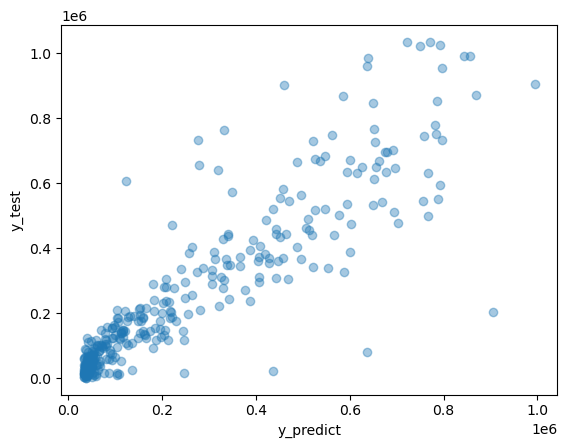

In [129]:
# This model is likely to perform linearly the best, since ServiceGamesPlayed and ReturnGamesPlayed are features that are the most strongly correlated with Winnings
PerformLinearRegression(['ReturnGamesPlayed', 'ServiceGamesPlayed'], 'Winnings')

Coefficient: [   1882.54 -229337.52]
Coefficient of determination: 0.7791046172437229


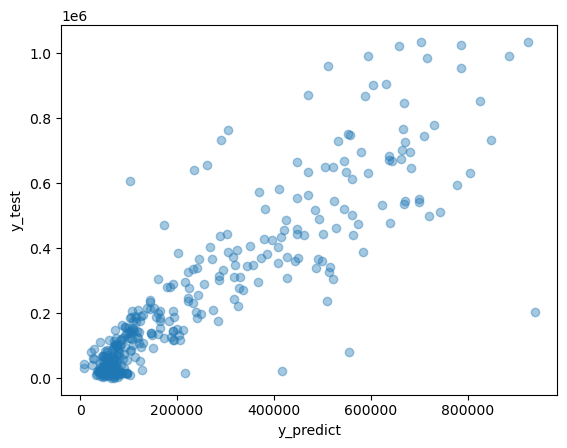

In [130]:
# Try hint selections
PerformLinearRegression(['BreakPointsOpportunities', 'FirstServeReturnPointsWon'], 'Winnings')

Coefficient: [ -61.73  606.91 -799.88  752.3   626.37  263.2 ]
Coefficient of determination: 0.8148992000743511


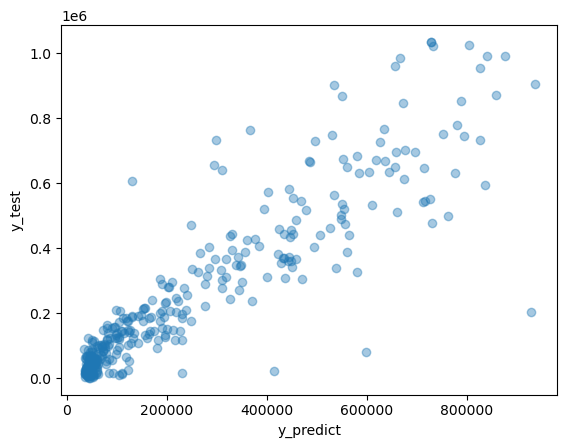

In [133]:
strong_variables = [ls[0] for ls in strong_correlated_w_winnings]
PerformLinearRegression(strong_variables, 'Winnings')

Coefficient: [ 4.6152660e+04  2.0429030e+05 -7.5425800e+04  1.4707326e+05
  8.3380700e+03 -7.0680000e+01 -3.5443900e+03 -8.3181000e+02
  6.3996000e+02  4.3302730e+04  6.0216000e+02  2.9746000e+02
  8.2295980e+04  2.3920000e+02  7.3036000e+02 -3.3427800e+03
 -1.7358570e+05 -2.7886734e+05]
Coefficient of determination: 0.8149220333672926


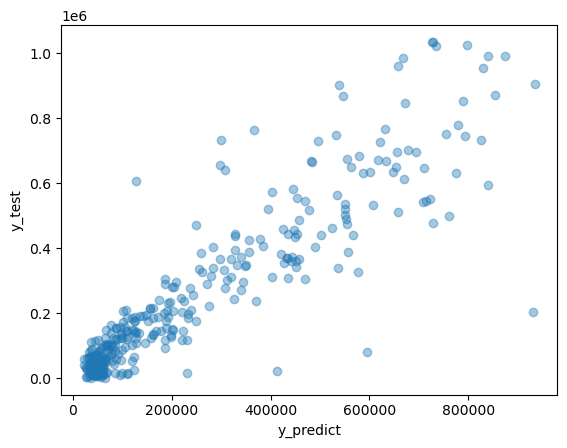

In [136]:
# Try hint selections
PerformLinearRegression(['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',\
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',\
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',\
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',\
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',\
'TotalServicePointsWon'], 'Winnings')